In [1]:
import os

In [2]:
import pandas as pd

In [3]:
df = pd.read_json(os.path.join("data", "filmy.json"))

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
profese = [
    "Animace",
    "Architekt",
    "Asistent kamery",
    "Asistent režie",
    "Autor komentáře",
    "Dramaturg",
    "Druhá kamera",
    "Hrají",
    "Hudba",
    "Choreografie",
    "Kamera",
    "Kaskadéři",
    "Koordinátor kaskadérů",
    "Koproducent",
    "Masky",
    "Návrhy kostýmů",
    "Návrhy titulků",
    "Odborný poradce",
    "Pedagogické vedení",
    "Pomocná režie",
    "Postprodukce",
    "Producent",
    "Produkce",
    "Předloha",
    "Původní filmový námět",
    "Režie",
    "Scénář",
    "Spolupráce",
    "Střih",
    "Technický scénář",
    "Vedoucí produkce",
    "Vedoucí výroby",
    "Výprava",
    "Výkonná produkce",
    "Výtvarná spolupráce",
    "Výtvarník",
    "Zástupce vedoucího produkce",
    "Zástupce vedoucího výroby",
    "Zpívá"]

In [6]:
def spoj(x):
    seznam = []
    if isinstance(x, str):
        if x.strip() not in seznam:
            seznam.append(x.strip())
    if isinstance(x, list):
        for y in x:
            if isinstance(y, str):
                if y.strip() not in seznam:
                    seznam.append(y.strip())
    return(seznam)

In [7]:
def spoj2(x):
    seznam = []
    for y in x:
        for z in y:
            if z not in seznam:
                seznam.append(z)
    return(seznam)

In [8]:
df["Lidé"] = df[profese].apply(lambda x: [spoj(x) for x in x.values], axis=1).apply(lambda x: spoj2(x))

In [11]:
lide = df[["Copyright","Film","Lidé","Režie"]].explode("Lidé").sort_values(by="Copyright")

In [12]:
tituly = pd.read_json(os.path.join("data", "tituly.json"))

In [14]:
lide = lide.merge(tituly, left_on="Lidé", right_on="Jméno")

In [20]:
lide[lide["Národní umělec"] < lide["Copyright"]].groupby("Film")["Jméno"].nunique().nlargest(10)

Film
Velká filmová loupež (397520)     8
Putování Jana Amose (397429)      6
Don Gio (397715)                  4
Komediant (397445)                4
Mladé víno (397526)               4
Pan Vok odchází (397227)          4
Svatá hříšnice (396880)           4
Evropa tančila valčík (397641)    3
Maratón (396790)                  3
Psohlavci (396208)                3
Name: Jméno, dtype: int64

In [22]:
lide[(lide["Národní umělec"] < lide["Copyright"]) | (lide["Zasloužilý umělec"] < lide["Copyright"])].groupby("Film")["Jméno"].nunique().nlargest(10)

Film
Proti všem (396252)               9
Velká filmová loupež (397520)     9
Hrátky s čertem (396261)          7
Jan Žižka (396216)                7
Mezi námi zloději (396538)        7
První parta (396362)              7
Srpnová neděle (396400)           7
Čintamani & podvodník (396606)    7
Bez svatozáře (396552)            6
Hry a sny (396335)                6
Name: Jméno, dtype: int64

<AxesSubplot:xlabel='Copyright'>

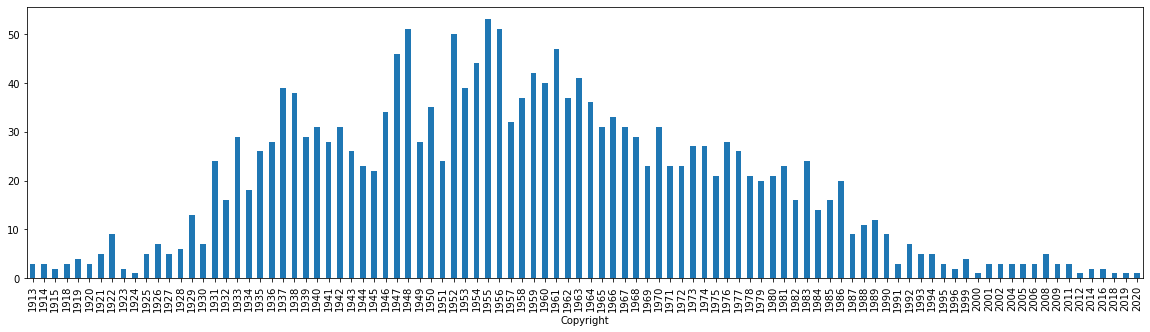

In [24]:
lide[lide["Národní umělec"] > 1900].groupby("Copyright")["Jméno"].nunique().plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

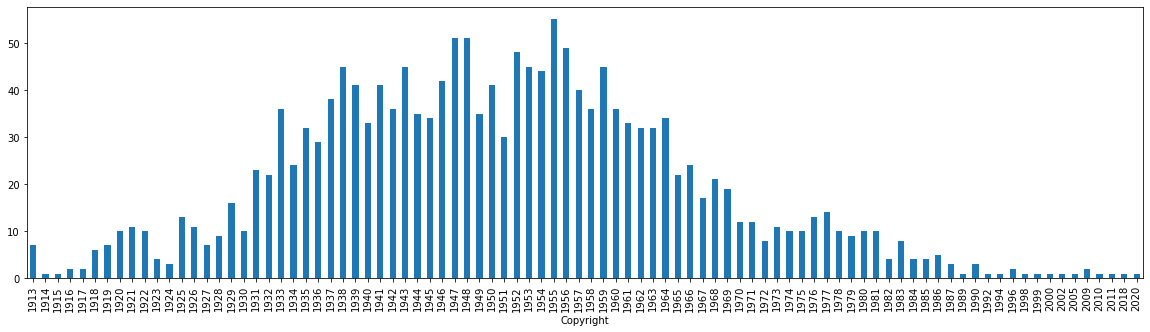

In [25]:
lide[lide["Zasloužilý umělec"] > 1900].groupby("Copyright")["Jméno"].nunique().plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

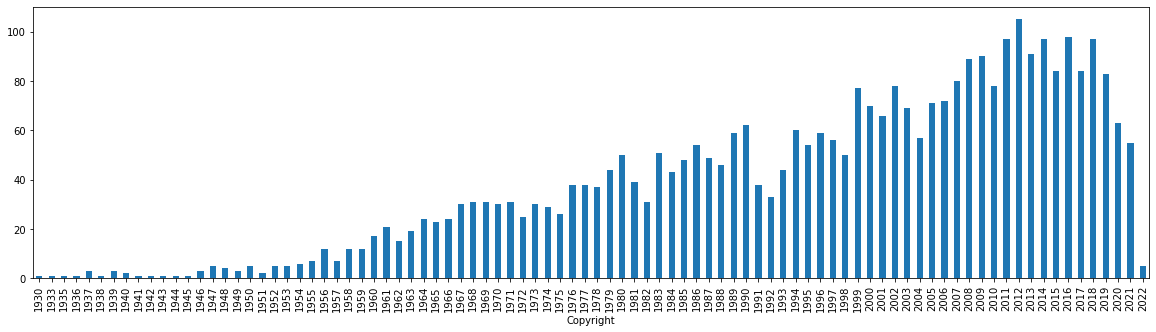

In [26]:
lide[lide["První lev"] > 1900].groupby("Copyright")["Jméno"].nunique().plot.bar(figsize=(20,5))

In [27]:
lide[(lide["První lev"] < lide["Copyright"])].groupby("Film")["Jméno"].nunique().nlargest(10)

Film
Po strništi bos (401274)                 13
Anděl Páně 2 (401251)                    12
Polski film (183460)                     11
Tři bratři (400626)                      11
Tátova volha (401758)                    10
Zahradnictví: Dezertér (401670)          10
Zahradnictví: Nápadník (401672)          10
Zahradnictví: Rodinný přítel (401671)    10
Čertí brko (401838)                      10
Andělé všedního dne (400528)              9
Name: Jméno, dtype: int64

In [28]:
lide[(lide["Národní umělec"] < lide["Copyright"]) | (lide["Zasloužilý umělec"] < lide["Copyright"]) | (lide["První lev"] < lide["Copyright"])].groupby("Film")["Jméno"].nunique().nlargest(10)

Film
Po strništi bos (401274)                 13
Anděl Páně 2 (401251)                    12
Polski film (183460)                     11
Tři bratři (400626)                      11
Odcházení (56870)                        10
Tátova volha (401758)                    10
Všichni moji blízcí (53125)              10
Zahradnictví: Dezertér (401670)          10
Zahradnictví: Nápadník (401672)          10
Zahradnictví: Rodinný přítel (401671)    10
Name: Jméno, dtype: int64

In [30]:
hraji = df[["Copyright","Film","Hrají"]].explode("Hrají").sort_values(by="Copyright")

In [31]:
hraji = hraji.merge(tituly, left_on="Hrají", right_on="Jméno")

In [32]:
hraji[(hraji["Národní umělec"] < hraji["Copyright"]) | (hraji["Zasloužilý umělec"] < hraji["Copyright"]) | (hraji["První lev"] < hraji["Copyright"])].groupby("Film")["Jméno"].nunique().nlargest(10)

Film
Anděl Páně 2 (401251)             9
Odcházení (56870)                 8
Velká filmová loupež (397520)     8
Anděl Páně (37354)                7
Andělé všedního dne (400528)      7
Jan Žižka (396216)                7
Mezi námi zloději (396538)        7
Proti všem (396252)               7
Všichni moji blízcí (53125)       7
Čintamani & podvodník (396606)    7
Name: Jméno, dtype: int64

In [34]:
hraji[(hraji["Národní umělec"] <= hraji["Copyright"]) | (hraji["Zasloužilý umělec"] <= hraji["Copyright"])].groupby("Film")["Jméno"].nunique().nlargest(10)

Film
Jan Žižka (396216)                9
Jan Hus (396186)                  8
Občan Brych (396331)              8
Proti všem (396252)               8
Psohlavci (396208)                8
Velká filmová loupež (397520)     8
Glorie (396332)                   7
Mezi námi zloději (396538)        7
Z mého života (396210)            7
Čintamani & podvodník (396606)    7
Name: Jméno, dtype: int64